## 查找

## 数据准备

In [7]:
!pip install numpy
!pip install matplotlib

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 12.8 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.7 MB/s eta 0:00:0031m12.4 MB/s eta 0:00:01


可以利用numpy方便生成伪随机数，为保证随机数结果每次一致，设置固定的随机数种子。

```python
import numpy as np
np.random.seed(0)
```

numpy提供了很多生成伪随机数的方法，如：
- `np.random.rand(d0, d1, ..., dn)`：生成[0, 1)之间的浮点数，参数为数组的维度。
- `np.random.randn(d0, d1, ..., dn)`：生成标准正态分布的浮点数，参数为数组的维度。
- `np.random.randint(low[, high, size, dtype])`：生成随机整数，参数为：
  - `low`：生成的数值最低为`low`。
  - `high`：生成的数值最高为`high`。
  - `size`：数组的维度。
  - `dtype`：数据类型，默认为`int64`，即由64个比特表示的数字。
  
下面采用`np.random.randint`生成10000个随机整数，范围在[0, 100000)之间。

In [23]:
import numpy as np

np.random.seed(0)
elements = np.random.randint(low=0, high=100000, size=100000, dtype=np.int32)
print("数据类型：", type(elements))

first_number = elements[0]
print("生成数字的第一个数字：", first_number)
print("生成的第一个数字的数据类型：", type(elements))
print("生成的第一个数字的数据类型：", type(first_number))

数据类型： <class 'numpy.ndarray'>
生成数字的第一个数字： 68268
生成的第一个数字的数据类型： <class 'numpy.ndarray'>
生成的第一个数字的数据类型： <class 'numpy.int32'>


我们可以通过matplotlib库来绘制numpy生成的随机数列表。matplotlib是一个Python的绘图库，它可以绘制各种类型的图表，包括折线图、散点图、柱状图等。
下面采用matplotlib提供的`hist`函数绘制直方图，`hist`函数可以将数据分成若干个区间，并统计每个区间内的数据个数，然后将这些数据绘制成直方图。

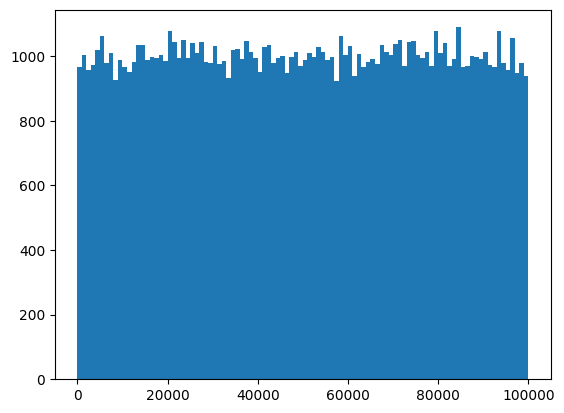

In [24]:
import matplotlib.pyplot as plt

plt.hist(elements, bins=100)
plt.show()

由于是均匀分布，每个区间内数值的个数大致相同，从上面的图形可以看出，数据的分布是基本均匀的。

`np.random.randint`生成的数据类型为`numpy.ndarray`，表示是一个数组，我们可以将其转换为Python默认的列表，方便按照标准的Python代码，编写和测试查找相关的算法。

In [25]:
elements = elements.tolist()

### 顺序查找

以下是最简单的顺序查找算法：

In [27]:
def search(elements, target):
    """从列表elements中寻找出现target的位置，如果找到，返回下标，如果没有，返回None

    Args:
        elements (list[int]): 待查找元素的查找表
        target (int): 待查找的元素
    """
    for idx, element in enumerate(elements):
        if element == target:
            return idx

    return None

以下是使用哨兵机制的查找算法的实现：

In [28]:
def search_with_sentinel(elements, target):
    """使用哨兵机制从列表 elements 中寻找目标元素 target 的位置。
    如果找到，返回其在原列表中的下标；如果未找到，返回 None。

    此函数通过在列表末尾添加目标元素作为哨兵，简化查找过程，避免每次循环都检查是否越界。

    Args:
        elements (list[int]): 待查找元素的列表。该列表会在函数执行过程中被修改，末尾会添加目标元素。
        target (int): 待查找的目标元素。

    Returns:
        int | None: 若目标元素在原列表中，返回其下标；若不在，返回 None。
    """
    # 初始化索引为 0，从列表第一个元素开始查找
    idx = 0
    # 在列表末尾添加目标元素作为哨兵，这样可以简化循环条件判断
    elements.append(target)  # 哨兵
    # 循环遍历列表，直到找到目标元素
    while elements[idx] != target:
        # 索引加 1，移动到下一个元素
        idx = idx + 1

    # 判断找到的目标元素是否是原列表中的，还是添加的哨兵
    if idx == len(elements) - 1:
        # 若是哨兵位置，说明原列表中不存在目标元素，返回 None
        return None
    else:
        # 若不是哨兵位置，说明在原列表中找到了目标元素，返回其下标
        return idx

带有哨兵机制的顺序查找算法能够节省比较时间。当查找的元素不在列表中时，该算法可避免大量无效比对，相较于单纯的顺序查找，能获得更高的效率。因此，我们可以选取一个不在列表中的数值，例如 -1，通过以下代码来对比简单查找算法与带有哨兵机制算法的速度差异。

In [34]:
import time

target = -1
start_time = time.time()
search(elements, target)
end_time = time.time() - start_time
print(f"顺序查找元素{target}共花费时间: {end_time:.6f} seconds")
start_time = time.time()
target = 5000
search(elements, target)
end_time = time.time() - start_time
print(f"带哨兵机制的算法查找元素{target}共花费时间: {end_time:.6f} seconds")

顺序查找元素-1共花费时间: 0.003519 seconds
带哨兵机制的算法查找元素5000共花费时间: 0.000105 seconds


## 二分查找

In [37]:
def binary_search(elements, target):
    """
    使用二分查找算法在有序列表中查找目标元素的索引。

    二分查找要求输入的列表 elements 必须是有序的，它通过不断将搜索区间缩小一半，
    直到找到目标元素或确定目标元素不存在。

    Args:
        elements (list): 一个有序的列表，包含待搜索的元素。
        target: 要在列表中查找的目标元素。

    Returns:
        int | None: 如果找到目标元素，返回其在列表中的索引；如果未找到，返回 None。
    """
    # 初始化搜索区间的左边界，从列表的第一个元素开始
    low = 0
    # 初始化搜索区间的右边界，为列表的最后一个元素的索引
    high = len(elements) - 1
    # 当左边界小于等于右边界时，继续搜索
    while low <= high:
        # 计算当前搜索区间的中间位置
        mid = (low + high) // 2
        # 如果中间位置的元素等于目标元素，返回中间位置的索引
        if elements[mid] == target:
            return mid
        # 如果中间位置的元素大于目标元素，说明目标元素在左半部分，更新右边界
        elif elements[mid] > target:
            high = mid - 1
        # 如果中间位置的元素小于目标元素，说明目标元素在右半部分，更新左边界
        else:
            low = mid + 1

    # 若循环结束仍未找到目标元素，返回 None
    return None

Python 3.x中，整除的运算符为“//”，即 5 // 2 = 2,而其他语言中常用的 “/”,Python会将数字转换为浮点数进行运算，因此： 5/2=2.5

In [38]:
print(5 // 2)
print(5 / 2)

2
2.5


比较顺序查找和二分查找的速度差异

In [39]:
import time

# 数据排序后，再来比较时间
elements = np.random.randint(low=0, high=200000, size=100000).tolist()
sorted_elements = sorted(elements)
target = 100000

start = time.time()
search(sorted_elements, target)
print(time.time() - start)

start = time.time()
binary_search(sorted_elements, target)
print(time.time() - start)

0.0019876956939697266
4.887580871582031e-05


### 二叉查找树
二叉排序树 (Binary Sort Tree) 或者是一棵空树; 或者是具有下列性质的二叉树:

1. 若左子树不空, 则左子树上所有结点的值均小于根结点的值; 若右子树不空, 则右子树上所有结点的值均大于根结点的值。

2. 左右子树也都是二叉排序树。对二叉排序树进行中序遍历, 可以得到一个按关键码有序的序列, 因此, 一个无序序列可通过构造二叉排序树而成为有序序列。

In [ ]:
class TreeNode:
    def __init__(self, value, left=None, right=None) -> None:
        self.value = value
        self.left = left
        self.right = right


class SearchTree:
    def __init__(self) -> None:
        self.root = None

    def search(self, data):
        """从当前节点开始查找data，如果没有找到，则把data插入树中，同时返回false，否则返回true"""
        parent = self.root
        current = self.root
        from_left = False  # 是否来自于父节点的左分支
        while current != None:
            if current.value == data:
                return True
            elif data < current.value:
                parent = current
                current = current.left
                from_left = True
            else:
                parent = current
                current = current.right
                from_left = False

        if parent == None:
            self.root = TreeNode(data)
        elif from_left:
            parent.left = TreeNode(data)
        else:
            parent.right = TreeNode(data)

        return False

    def inorder_traverse(self, node: TreeNode):
        path = []
        if node.left != None:
            path.extend(self.inorder_traverse(node.left))

        path.append(node.value)

        if node.right != None:
            path.extend(self.inorder_traverse(node.right))

        return path

In [ ]:
tree = SearchTree()

numbers = [63, 90, 70, 55, 67, 42, 98, 83, 10, 45, 58]
for n in numbers:
    found = tree.search(n)
    print(n, found)

path = tree.inorder_traverse(tree.root)
print(path)

In [ ]:
x = [1, 3, 5]
y = [7, 9, 10]
# x.append(y)
x.extend(y)
print(x)

[1, 3, 5, 7, 9, 10]


### 哈希表

对应到Python中的字典结构，Java里面的Map

In [ ]:
# name_ages = dict()
name_ages = {}
name_ages["han"] = 18
name_ages["bai"] = 20
name_ages["zhang"] = 18
name_ages["zhao"] = 20
name_ages["liu"] = 18
name_ages["an"] = 20

for key, value in name_ages.items():
    print(key, "=", value)

han = 18
bai = 20
zhang = 18
zhao = 20
liu = 18
an = 20


In [ ]:
from collections import OrderedDict

name_ages = OrderedDict()
name_ages["han"] = 18
name_ages["bai"] = 20
name_ages["zhang"] = 18
name_ages["zhao"] = 20
name_ages["liu"] = 18
name_ages["an"] = 20

for key, value in reversed(name_ages.items()):
    print(key, "=", value)

an = 20
liu = 18
zhao = 20
zhang = 18
bai = 20
han = 18
